In [1]:
from oggm import cfg, workflow, utils, shop
import pandas as pd
import os, glob
import numpy as np
import xarray as xr
import seaborn as sns
import matplotlib.pyplot as plt

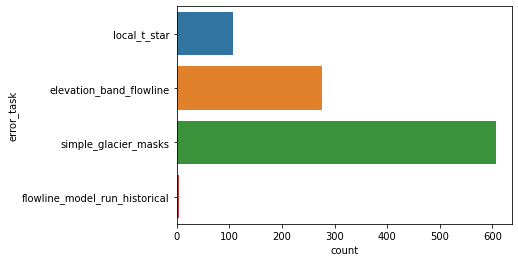

0.16733344027374933


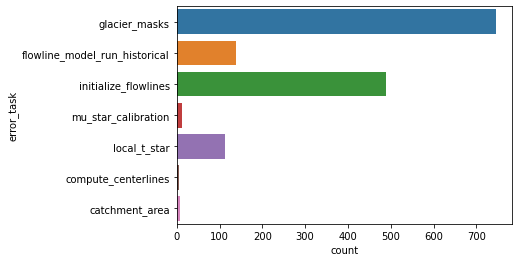

0.8451329397803601


In [2]:
border = 80

dfserr = []

for exp in ['elev_bands', 'centerlines']:  # 

    fd = f'ERA5/{exp}/qc3/pcp1.6/no_match/RGI62/b_{border:03d}/L5/summary/'
    fs = glob.glob(fd+'glacier_statistics*.csv')
    assert len(fs) == 19
    
    df = []
    for f in fs:
        df.append(pd.read_csv(f, index_col=0, low_memory=False))
    df = pd.concat(df).sort_index()
    
    plt.figure()
    sns.countplot(y="error_task", data=df);
    plt.show()
    
    print(df.loc[~df['error_task'].isnull()].rgi_area_km2.sum() / df.rgi_area_km2.sum() * 100)
    
    dfserr.append(df.loc[~df['error_task'].isnull()].sort_values(by='rgi_area_km2', ascending=False)[['rgi_area_km2', 'error_task', 'error_msg']].iloc[:15])

In [3]:
dfserr[0]

rgi_area_km2                     error_task  \
rgi_id                                                        
RGI60-19.00307       231.825                   local_t_star   
RGI60-19.00197       110.340                   local_t_star   
RGI60-19.00231        68.673                   local_t_star   
RGI60-19.00303        67.189                   local_t_star   
RGI60-19.00346        65.269                   local_t_star   
RGI60-10.00002        48.144           simple_glacier_masks   
RGI60-19.00226        35.774                   local_t_star   
RGI60-17.10163        28.370  flowline_model_run_historical   
RGI60-15.10055        26.727                   local_t_star   
RGI60-15.01996        16.642                   local_t_star   
RGI60-15.04835        15.377                   local_t_star   
RGI60-10.00006        12.966           simple_glacier_masks   
RGI60-16.00735        10.740                   local_t_star   
RGI60-15.01950         9.863                   local_t_star   
RGI60-12.01364         9.250           simple_glacier_masks   

                                                        error_msg  
rgi_id                                                             
RGI60-19.00307  MassBalanceCalibrationError: RGI60-19.00307: m...  
RGI60-19.00197  MassBalanceCalibrationError: RGI60-19.00197: m...  
RGI60-19.00231  MassBalanceCalibrationError: RGI60-19.00231: m...  
RGI60-19.00303  MassBalanceCalibrationError: RGI60-19.00303: m...  
RGI60-19.00346  MassBalanceCalibrationError: RGI60-19.00346: m...  
RGI60-10.00002  GeometryError: RGI60-10.00002 is a nominal gla...  
RGI60-19.00226  MassBalanceCalibrationError: RGI60-19.00226: m...  
RGI60-17.10163  RuntimeError: Glacier exceeds domain boundarie...  
RGI60-15.10055  MassBalanceCalibrationError: RGI60-15.10055: m...  
RGI60-15.01996  MassBalanceCalibrationError: RGI60-15.01996: m...  
RGI60-15.04835  MassBalanceCalibrationError: RGI60-15.04835: m...  
RGI60-10.00006  GeometryError: RGI60-10.00006 is a nominal gla...  
RGI60-16.00735  MassBalanceCalibrationError: RGI60-16.00735: m...  
RGI60-15.01950  MassBalanceCalibrationError: RGI60-15.01950: m...  
RGI60-12.01364  GeometryError: RGI60-12.01364 is a nominal gla...

In [4]:
dfserr[1]

rgi_area_km2                     error_task  \
rgi_id                                                        
RGI60-01.17566      1177.246  flowline_model_run_historical   
RGI60-13.54431       663.729  flowline_model_run_historical   
RGI60-14.04593       393.023  flowline_model_run_historical   
RGI60-14.04638       295.324  flowline_model_run_historical   
RGI60-13.43483       282.721  flowline_model_run_historical   
RGI60-01.16377       254.841  flowline_model_run_historical   
RGI60-19.00307       231.825                   local_t_star   
RGI60-14.04404       203.336  flowline_model_run_historical   
RGI60-19.01521        94.963           initialize_flowlines   
RGI60-17.15877        80.347  flowline_model_run_historical   
RGI60-17.13796        69.313  flowline_model_run_historical   
RGI60-19.00231        68.673                   local_t_star   
RGI60-19.00303        67.189                   local_t_star   
RGI60-17.15825        65.501  flowline_model_run_historical   
RGI60-01.09783        52.602  flowline_model_run_historical   

                                                        error_msg  
rgi_id                                                             
RGI60-01.17566  RuntimeError: CFL error: required time step sm...  
RGI60-13.54431  RuntimeError: CFL error: required time step sm...  
RGI60-14.04593  RuntimeError: CFL error: required time step sm...  
RGI60-14.04638  RuntimeError: CFL error: required time step sm...  
RGI60-13.43483  RuntimeError: CFL error: required time step sm...  
RGI60-01.16377  RuntimeError: CFL error: required time step sm...  
RGI60-19.00307  MassBalanceCalibrationError: RGI60-19.00307: m...  
RGI60-14.04404  RuntimeError: CFL error: required time step sm...  
RGI60-19.01521  RuntimeError: Altitude range of main flowline ...  
RGI60-17.15877  RuntimeError: CFL error: required time step sm...  
RGI60-17.13796  RuntimeError: CFL error: required time step sm...  
RGI60-19.00231  MassBalanceCalibrationError: RGI60-19.00231: m...  
RGI60-19.00303  MassBalanceCalibrationError: RGI60-19.00303: m...  
RGI60-17.15825  RuntimeError: CFL error: required time step sm...  
RGI60-01.09783  RuntimeError: CFL error: required time step sm...